Code to create fake news Facebook posts bar plot in summarize_single_var lecture. Uses [Buzzfeed News data](https://github.com/BuzzFeedNews/2018-12-fake-news-top-50), slightly cleaned and saved in this course github.

In [1]:
import pandas as pd
# not used in course directly. used just to save the figure here
import matplotlib.pyplot as plt 

In [2]:
fb = pd.read_csv('https://raw.githubusercontent.com/brendanrbrown/stor155_sp21/main/data/fakebook_buzzfeed_2018.csv')

In [3]:
fb.head()

,title,url,fb_engagement,published_date,category,source
0,"Lottery winner arrested for dumping $200,000 o...",https://worldnewsdailyreport.com/lottery-winne...,2383021.0,2018-05-13,Crime,NaN
1,Former first lady Barbara Bush dies at 92 - CNN,http://breaking-cnn.com/former-first-lady-barb...,2290000.0,2018-04-16,Politics,Trendolizer
2,Woman sues Samsung for $1.8M after cell phone ...,https://worldnewsdailyreport.com/woman-sues-sa...,1304430.0,2018-09-19,Medical,NaN
3,BREAKING: Michael Jordan Resigns From The Boar...,https://trumpbetrayed.us/all/breaking-michael-...,911336.0,2018-09-05,Business,NaN
4,Donald Trump Ends School Shootings By Banning ...,https://www.8shit.net/donald-trump-ends-school...,830116.0,2018-02-23,Politics,NaN


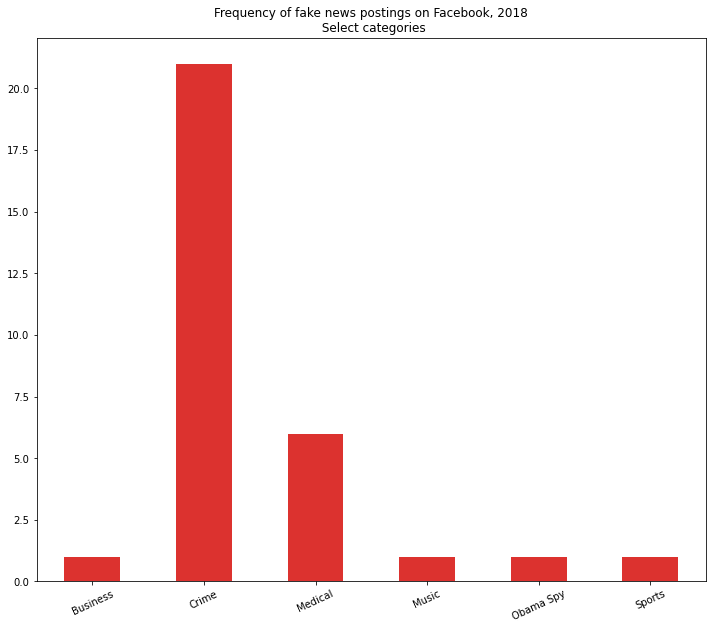

In [4]:
# too many small categories. focus on these
# "Obama Spy", "Crime", "Medical", "Business", "Sports", "Music"
fb.loc[fb.loc[:, 'category'].isin(["Obama Spy", "Crime", "Medical", "Business", "Sports", "Music"])
      ].groupby('category'
                 ).count().loc[:, 'title'].plot(kind = 'bar', color = '#dc322f', figsize = (12, 10), rot = 25, xlabel = "",
                                      title = 'Frequency of fake news postings on Facebook, 2018\n Select categories')

plt.savefig('fakebook_select_cat.jpeg')

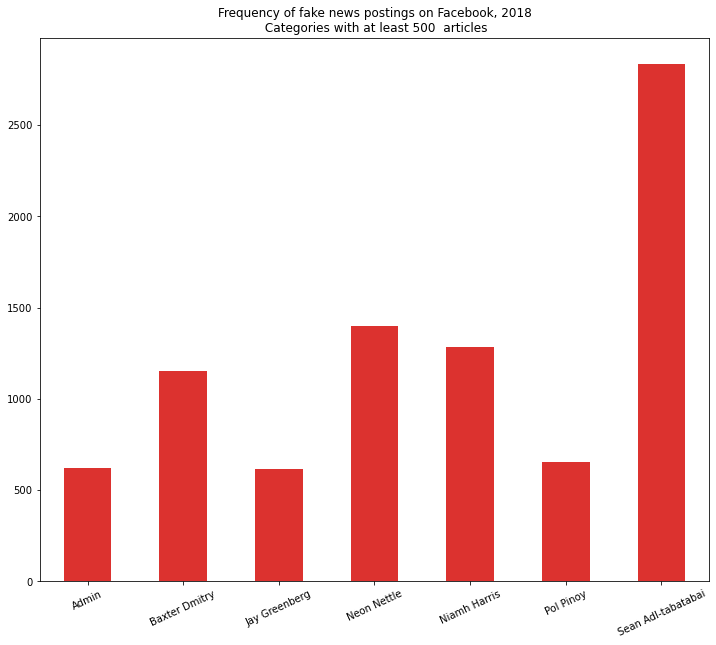

In [5]:
# and now just those with at least 500 postings
# and also with a few methods used
fb.groupby('category').count().query('title > 500').title.plot(kind = 'bar', color = '#dc322f', figsize = (12, 10), rot = 25, xlabel = "",
                                      title = 'Frequency of fake news postings on Facebook, 2018\n Categories with at least 500  articles')

plt.savefig('fakebook_over500_cat.jpeg')

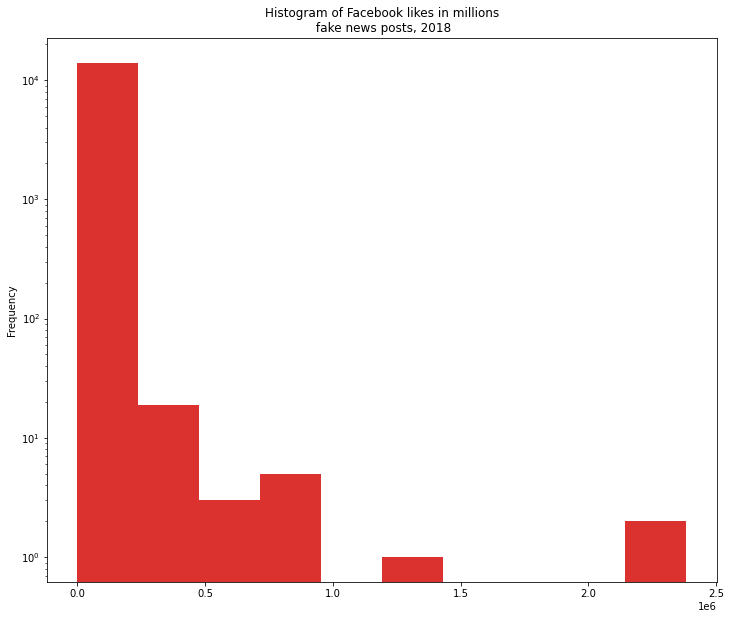

In [6]:
fb.loc[:, 'fb_engagement'].plot(kind = 'hist', color = '#dc322f', figsize = (12, 10), logy = True,
                               xlabel = 'fb_engagement', title = 'Histogram of Facebook likes in millions\n fake news posts, 2018')

plt.savefig('fakebook_likes_bigbin.jpeg')

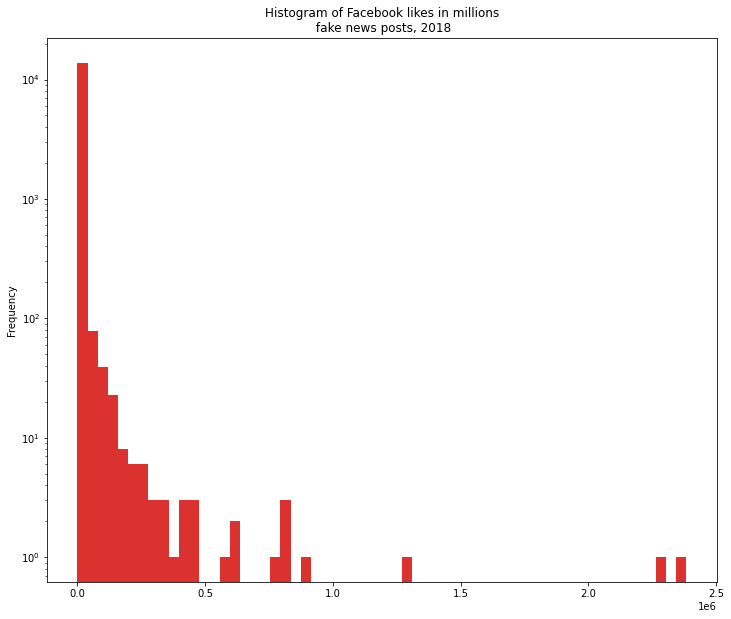

In [7]:
fb.fb_engagement.plot(kind = 'hist', color = '#dc322f', figsize = (12, 10), logy = True, bins = 60, 
                               xlabel = 'fb_engagement', title = 'Histogram of Facebook likes in millions\n fake news posts, 2018')

plt.savefig('fakebook_likes_smallbin.jpeg')

In [8]:
fb.fb_engagement.describe(), 

(count    1.396100e+04
 mean     3.103506e+03
 std      3.882450e+04
 min      0.000000e+00
 25%      2.000000e+00
 50%      5.200000e+01
 75%      2.540000e+02
 max      2.383021e+06
 Name: fb_engagement, dtype: float64,)

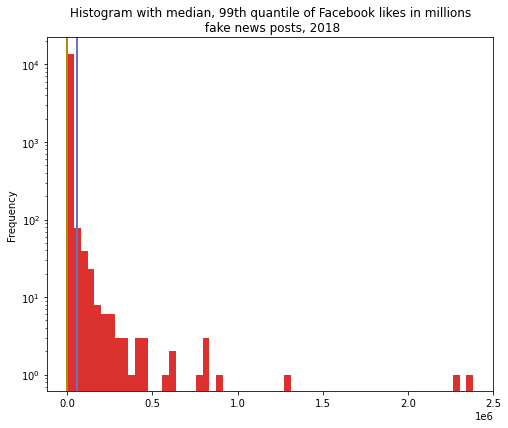

In [9]:
# add a median line
p = fb.fb_engagement.plot(kind = 'hist', color = '#dc322f', figsize = (8, 6.5), logy = True, bins = 60,
                               xlabel = 'fb_engagement', title = 'Histogram with median, 99th quantile of Facebook likes in millions\n fake news posts, 2018')

p.axvline(x = fb.fb_engagement.median(), color = "#b58900", linewidth = 2)
p.axvline(x = fb.fb_engagement.quantile(.99), color = "#6c71c4", linewidth = 2)

plt.savefig('fakebook_likes_q50.jpeg')

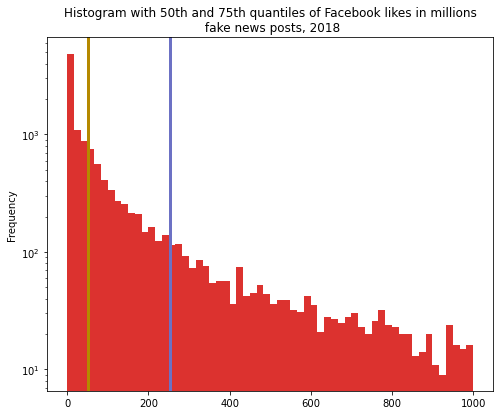

In [10]:
# zoom in!
# filter first to get good resolution without computing so many bins
p = fb.loc[fb.fb_engagement < 1000, 'fb_engagement'].plot(kind = 'hist', color = '#dc322f', figsize = (8, 6.5), logy = True, bins = 60, 
                               xlabel = 'fb_engagement', title = 'Histogram with 50th and 75th quantiles of Facebook likes in millions\n fake news posts, 2018')

p.axvline(x = fb.fb_engagement.median(), color = "#b58900", linewidth = 3)
p.axvline(x = fb.fb_engagement.quantile(.75), color = "#6c71c4", linewidth = 3)

plt.savefig('fakebook_likes_q5075.jpeg')